# Breast Cancer Diagnostics 
- By Valentine Ezenwanne


## Project Objective
- To build a machine learning model that will be used to predict whether the breast cancer cell is benign or malignant.

- The model will take features from a digitized image of a fine aspirate of a breast cancer cell and predict whether the cell is benign or malignant with more 95% accuracy score

# About Dataset

## Dataset Description
The dataset contains Features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. 
They describe characteristics of the cell nuclei present in the image.

The dataset was collected from kaggle: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

### Feature Descriptions
1) ID number
2) Diagnosis (M = malignant, B = benign)


**Ten real-valued features are computed for each cell nucleus:(3-32)**

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)


The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

# Import the packages

In [1]:
#import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Dataset

In [2]:
#load the dataset
df = pd.read_csv('data.csv')

# Data Wrangling

In [3]:
#understand the shape 
df.shape

(569, 33)

- The dataset contains 569 records and 33 columns

In [4]:
#check the datatypes
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

- The dataset comprises of integer, floats and object

In [5]:
#display the first few lines
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
#display the last few lines
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


- There are two columns that are irrelevant; **id** and **unnamed** which has to be deleted

In [7]:
#Check for missing values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

- There are 569 missing values in the Unnamed column which the column has to be deleted

In [8]:
#check for duplicates
df.duplicated().sum()

0

- There are no duplicates in the dataset

In [9]:
#check for value counts in the diagnosis column
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

- The dataset contain an imbalanced data, the malignat data comprises about 37% while the benign is about 63%

In [10]:
#checking for the unique value in the diagnosis column
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

- The **diagnosis** column contain data of type 'object' and must be converted to integer via **data mapping**

## Data Cleaning

#### Dropping irrelevant columns

In [11]:
#deleting the irrelevant columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [12]:
#check if the columns have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

- The two columns has been dropped

# Data Exploration

## Univariate Exploration

In [13]:
#check the descriptive statistics of the numerial features
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Data Visualization

#### Plotting a bar chart of the diagnosis feature

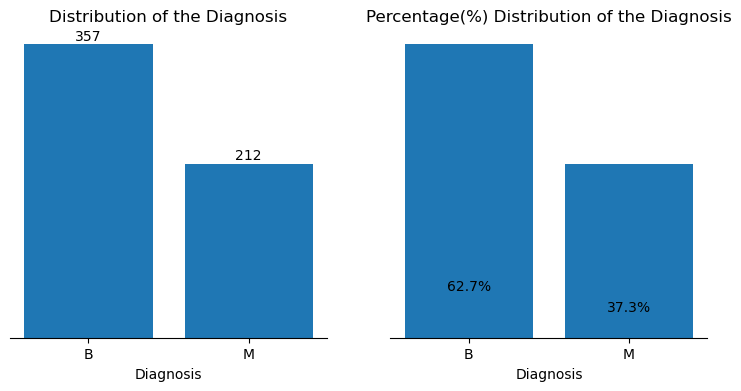

In [15]:
#calculating the percentages of each unique value in the diagnosis
B_perc = round(len(df[df['diagnosis']=='B'])/len(df['diagnosis']) * 100, 1 )
M_perc = round(len(df[df['diagnosis']=='M'])/len(df['diagnosis']) * 100, 1 )
perc = [B_perc, M_perc]

# Defining the plot area and the items
fig, ax = plt.subplots(1, 2, figsize=[9,4])
ax[0].bar(x=df['diagnosis'].value_counts().index, height=df['diagnosis'].value_counts().values)

#adding the title, labels and removing spines
ax[0].set_title('Distribution of the Diagnosis')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Diagnosis')
ax[0].spines[['top', 'right', 'left']].set_visible(False)
ax[0].yaxis.set_visible(False)

#annotate the bar
for index, values in enumerate(df['diagnosis'].value_counts()):
    ax[0].annotate(values, xy=(index, values+10), ha='center', va='center')

ax[1].bar(x=df['diagnosis'].value_counts().index, height=df['diagnosis'].value_counts().values)    
ax[1].set_title('Percentage(%) Distribution of the Diagnosis')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Diagnosis')
ax[1].spines[['top', 'right', 'left']].set_visible(False)
ax[1].yaxis.set_visible(False)


#annotate the bar
for index, values in enumerate(perc):
    ax[1].annotate(str(values)+'%', xy=(index, values), ha='center', va='center')

    
plt.show()

- The barchart shows that more than 60% of the data is benign the rest is Malignant. Therefore, the dataset is imbalanced

 ### Plotting the distribution of radius

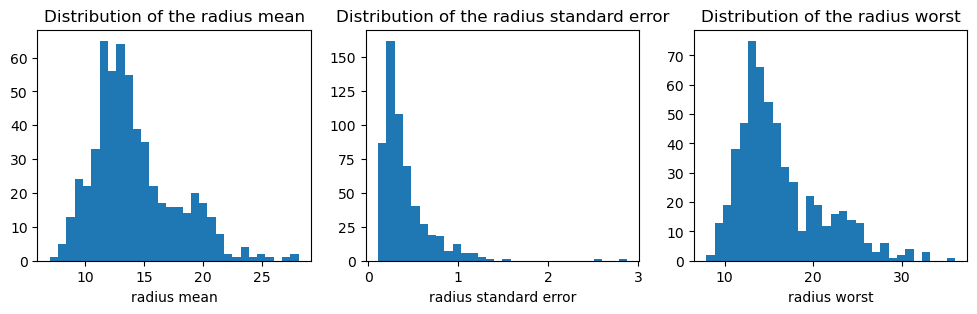

In [16]:
fig, ax = plt.subplots(1, 3, figsize=[12, 3])
ax[0].hist(df['radius_mean'], bins = 30)
ax[1].hist(df['radius_se'], bins=30)
ax[2].hist(df['radius_worst'], bins=30)

ax[0].set_title('Distribution of the radius mean')
ax[0].set_xlabel('radius mean')

ax[1].set_title('Distribution of the radius standard error')
ax[1].set_xlabel('radius standard error')

ax[2].set_title('Distribution of the radius worst')
ax[2].set_xlabel('radius worst')

plt.show()

- The radius mean is skewed to the right and have peaked at values above 60
- The radius standard error is skewed to the right and has outliers
- The radius worst is also skewed to the right

## Bivariate Exploration

#### Comparing the mean, standard error and worst for `Radius, Texture and Compactness`

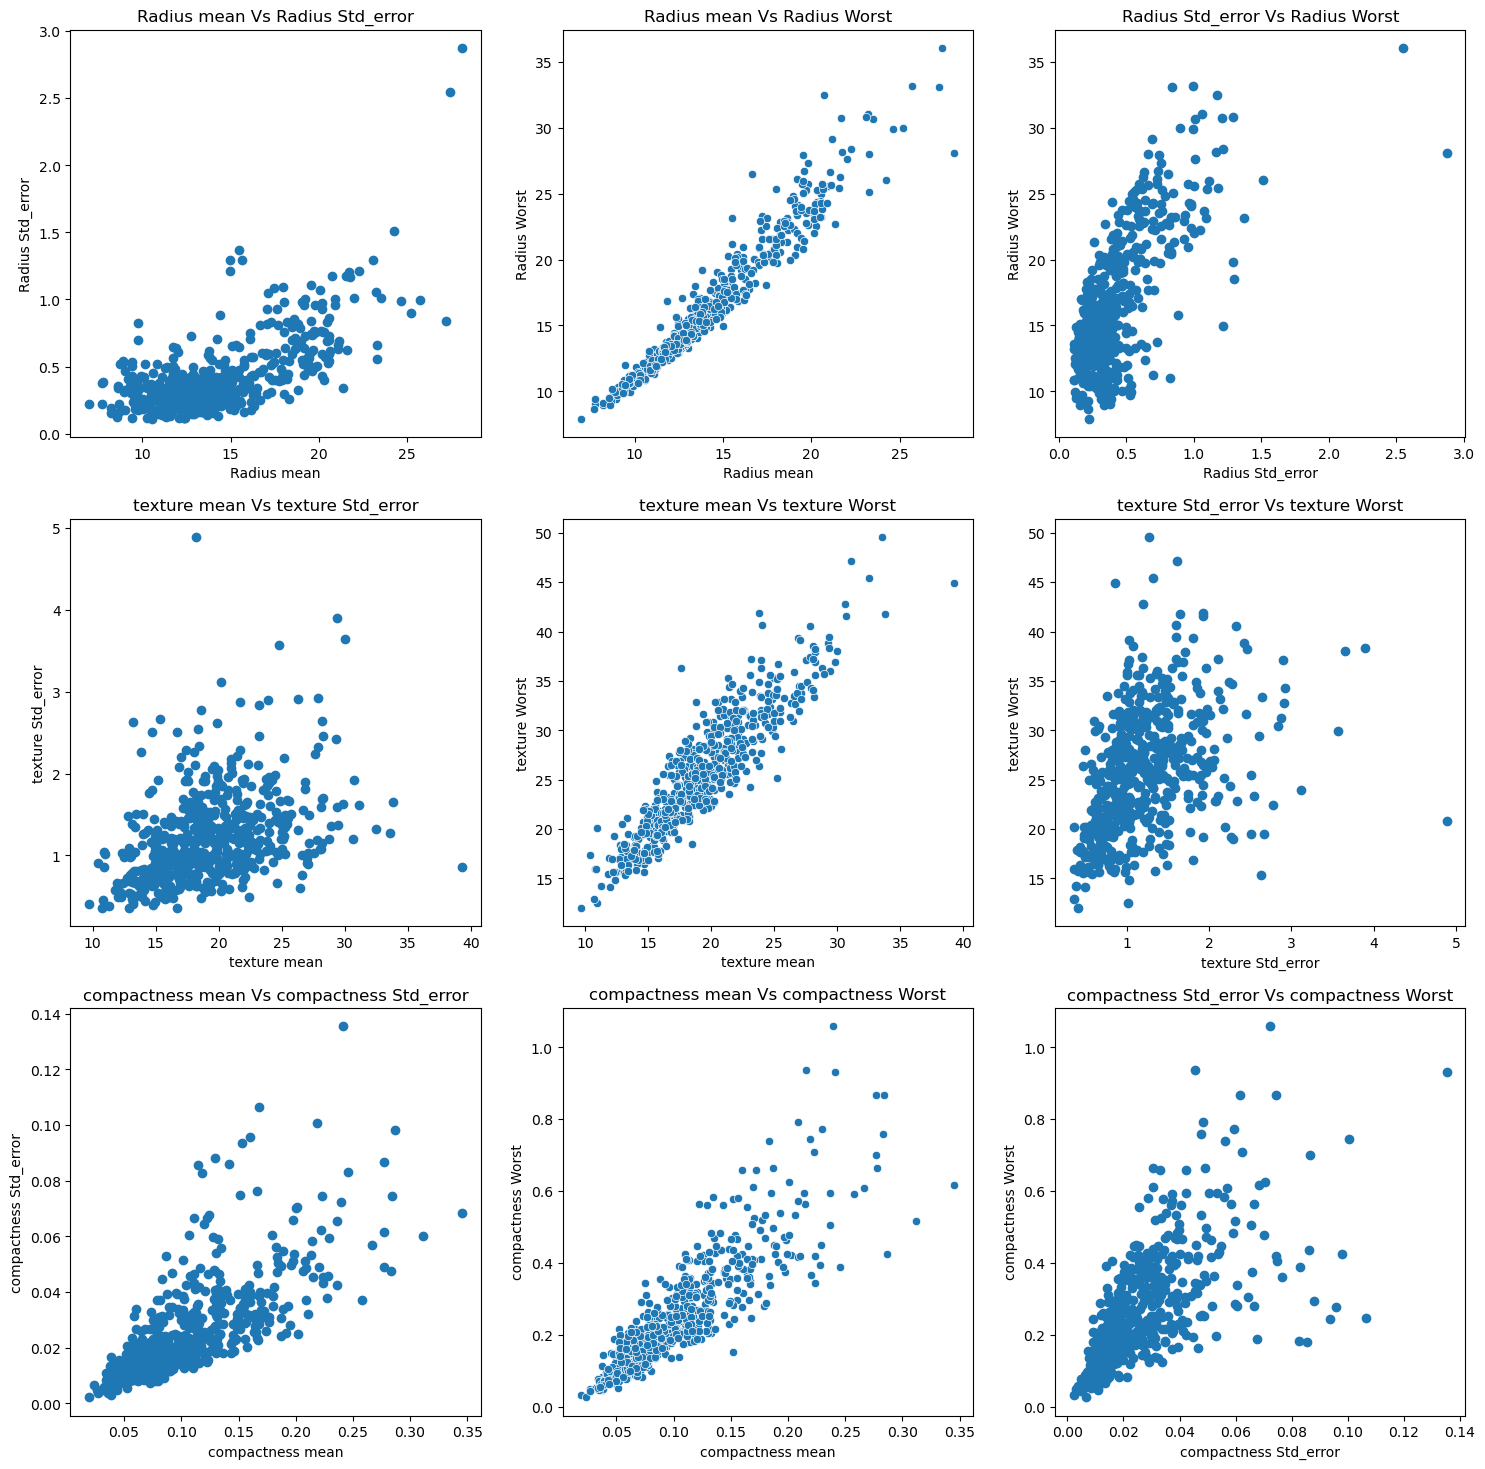

In [21]:
#comparing the radius mean, radius standard error and radius worst

#plot 1
fig, ax = plt.subplots(3, 3, figsize=[18,18])
ax[0,0].scatter(df['radius_mean'], df['radius_se'])
sns.scatterplot(data=df, x='radius_mean', y='radius_worst', ax=ax[0,1])
ax[0,2].scatter(df['radius_se'], df['radius_worst'])

#setting the title, x and y label
ax[0,0].set_title('Radius mean Vs Radius Std_error')
ax[0,0].set_xlabel('Radius mean')
ax[0,0].set_ylabel('Radius Std_error')

#setting the title, x and y label
ax[0,1].set_title('Radius mean Vs Radius Worst')
ax[0,1].set_xlabel('Radius mean')
ax[0,1].set_ylabel('Radius Worst')

#setting the title, x and y label
ax[0,2].set_title('Radius Std_error Vs Radius Worst')
ax[0,2].set_xlabel('Radius Std_error')
ax[0,2].set_ylabel('Radius Worst')

#plot 2
ax[1,0].scatter(df['texture_mean'], df['texture_se'])
sns.scatterplot(data=df, x='texture_mean', y='texture_worst', ax=ax[1,1])
ax[1,2].scatter(df['texture_se'], df['texture_worst'])

#setting the title, x and y label
ax[1,0].set_title('texture mean Vs texture Std_error')
ax[1,0].set_xlabel('texture mean')
ax[1,0].set_ylabel('texture Std_error')

#setting the title, x and y label
ax[1,1].set_title('texture mean Vs texture Worst')
ax[1,1].set_xlabel('texture mean')
ax[1,1].set_ylabel('texture Worst')

#setting the title, x and y label
ax[1,2].set_title('texture Std_error Vs texture Worst')
ax[1,2].set_xlabel('texture Std_error')
ax[1,2].set_ylabel('texture Worst')

#plot 3
ax[2,0].scatter(df['compactness_mean'], df['compactness_se'])
sns.scatterplot(data=df, x='compactness_mean', y='compactness_worst', ax=ax[2,1])
ax[2,2].scatter(df['compactness_se'], df['compactness_worst'])

#setting the title, x and y label
ax[2,0].set_title('compactness mean Vs compactness Std_error')
ax[2,0].set_xlabel('compactness mean')
ax[2,0].set_ylabel('compactness Std_error')

#setting the title, x and y label
ax[2,1].set_title('compactness mean Vs compactness Worst')
ax[2,1].set_xlabel('compactness mean')
ax[2,1].set_ylabel('compactness Worst')

#setting the title, x and y label
ax[2,2].set_title('compactness Std_error Vs compactness Worst')
ax[2,2].set_xlabel('compactness Std_error')
ax[2,2].set_ylabel('compactness Worst')

plt.show()

- The variables show a linear relationship

# Data Preprocessing

In [22]:
#display the first few lines
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


#### Converting the Diagnosis column to integer

In [23]:
#map the values in diagnosis to integer

#create a map dictionary
map_dict = {
    'B': 0,
    'M': 1
}

#map the diagnosis
df['diagnosis'] = df['diagnosis'].map(map_dict)

In [24]:
#confirming the diagnosis column has been mapped
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

#### Selecting the input features and target features

In [25]:
#selecting input features
X = df.drop('diagnosis', axis=1)

In [26]:
X.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [27]:
#selecting the target feature
y = df['diagnosis']

In [28]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

# Model Building

In [29]:
#import the modules
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [30]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#checking the shapes
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (455, 30)
X_test:  (114, 30)
y_train:  (455,)
y_test:  (114,)


## Feature Scaling

In [32]:
#instantiate the scaler
scaler = StandardScaler()

In [33]:
#fit and transform the X_train dataset
X_train = scaler.fit_transform(X_train)

In [34]:
#transform the X_test dataset
X_test = scaler.transform(X_test)

## Define the Models

In [35]:
models = {
    'LogisticRegression': {
        'model': LogisticRegression()},
    'SVM': {
        'model': SVC()},
    'DecisionTree': {
        'model': DecisionTreeClassifier()},
    'RandomForest': {
        'model': RandomForestClassifier()},
    'NaiveBayes': {
        'model': GaussianNB()},
    'KNN': {
        'model':KNN()}
}

#### Create a function for fitting the model and predicting

In [36]:
#define a function that will take the models, X_train, y_train, x_test, y_test and return the accuracy score

def model_score(models, X_train, y_train, X_test, y_test):
    '''
    function that will take the models, X_train, y_train, x_test, y_test and return the accuracy score, precision, recall and 
    f1_score
    '''
    
    #create a score list
    scores_param = []
    
    #create a for loop
    for model_name, mod in models.items():
        #instantiate the model
        model = mod['model']
        
        #fit the model
        model.fit(X_train, y_train)
        
        #predict the X_test
        y_pred = model.predict(X_test)
        
        #evaluate the model
        a_score = accuracy_score(y_test, y_pred)
        p_score = precision_score(y_test, y_pred)
        r_score = recall_score(y_test, y_pred)
        f_score = f1_score(y_test, y_pred)
        
        #append the scores
        scores_param.append(
        {
            'model_name': model_name,
            'accuracy_score': a_score.round(3),
            'precision_score': p_score.round(2),
            'recall_score': r_score.round(2),
            'f1_score': f_score.round(2)
        }
        )
    return scores_param

In [37]:
#calling the model function
scores = model_score(models, X_train, y_train, X_test, y_test)

In [38]:
#display the scores
scores

[{'model_name': 'LogisticRegression',
  'accuracy_score': 0.974,
  'precision_score': 0.98,
  'recall_score': 0.95,
  'f1_score': 0.96},
 {'model_name': 'SVM',
  'accuracy_score': 0.982,
  'precision_score': 1.0,
  'recall_score': 0.95,
  'f1_score': 0.98},
 {'model_name': 'DecisionTree',
  'accuracy_score': 0.93,
  'precision_score': 0.91,
  'recall_score': 0.91,
  'f1_score': 0.91},
 {'model_name': 'RandomForest',
  'accuracy_score': 0.956,
  'precision_score': 0.95,
  'recall_score': 0.93,
  'f1_score': 0.94},
 {'model_name': 'NaiveBayes',
  'accuracy_score': 0.965,
  'precision_score': 0.98,
  'recall_score': 0.93,
  'f1_score': 0.95},
 {'model_name': 'KNN',
  'accuracy_score': 0.947,
  'precision_score': 0.93,
  'recall_score': 0.93,
  'f1_score': 0.93}]

In [39]:
#convert the scores to dataframe
score_data = pd.DataFrame(scores)

In [40]:
#display the dataframe
score_data

,model_name,accuracy_score,precision_score,recall_score,f1_score
0,LogisticRegression,0.974,0.98,0.95,0.96
1,SVM,0.982,1.00,0.95,0.98
2,DecisionTree,0.930,0.91,0.91,0.91
3,RandomForest,0.956,0.95,0.93,0.94
4,NaiveBayes,0.965,0.98,0.93,0.95
5,KNN,0.947,0.93,0.93,0.93


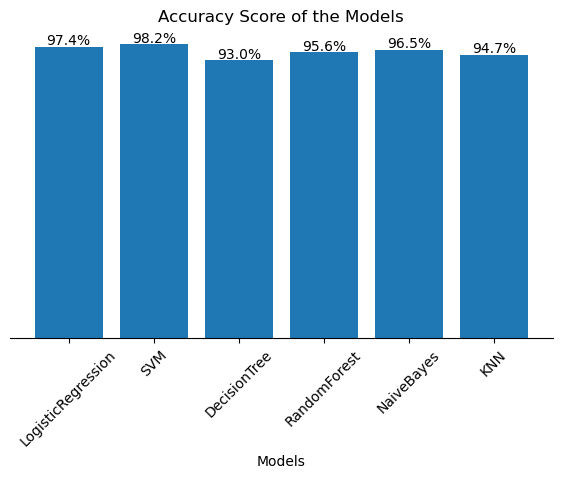

In [41]:
#plot a bar chart of the scores

fig, ax = plt.subplots(figsize=[7,4])
ax.bar( x=score_data['model_name'], height=score_data['accuracy_score'])

ax.set_title('Accuracy Score of the Models')
ax.set_xlabel('Models')
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.yaxis.set_visible(False)
plt.xticks(rotation=45)
for index, values in enumerate(score_data['accuracy_score']):
    ax.annotate(str(round(values*100, 2))+'%', xy=(index, values+0.02), va='center', ha='center')
plt.show()

- The graph shows that Support Vector Classifier perform best with a 98.2% accuracy followed by LogisticRegression (97.4%), Naives Bayes and Random Forest are slightly above 95%

# Model Evaluation

## Cross Validation of Models

In [42]:
#create a function for cross validation

def cross_val(models, X_train, y_train, k):
    '''
    this functions takes the different model and perform a five(5) fold cross validation
    '''
    #create a list for the score
    score_param = []
    
    #creae a for loop to loop through the models
    for model_name, mod in models.items():
        score_cv = cross_val_score(mod['model'], X_train, y_train, cv=k)
        score_mean = score_cv.mean()
        score_std = score_cv.std()
        
        score_param.append({
            'model_name': model_name,
            'cv_score_mean': score_mean,
            'cv_standard_deviation': score_std
        })
    return score_param

In [43]:
#calling the cross validation function
cv_scores = cross_val(models, X_train, y_train, 5)

In [44]:
#convert the cross validation scores to dataframe
cv_data = pd.DataFrame(cv_scores)
cv_data

,model_name,cv_score_mean,cv_standard_deviation
0,LogisticRegression,0.973626,0.017855
1,SVM,0.975824,0.012815
2,DecisionTree,0.916484,0.025631
3,RandomForest,0.956044,0.018388
4,NaiveBayes,0.934066,0.020850
5,KNN,0.960440,0.021534


### Plotting a barplot of the Cross Validation scores

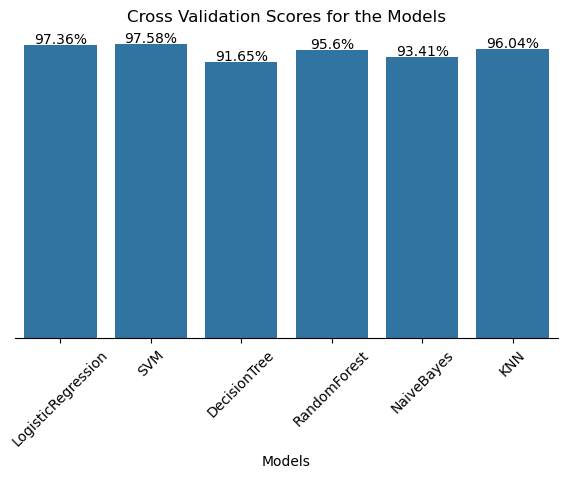

In [45]:
fig, ax = plt.subplots(figsize=[7,4])
base_color = sns.color_palette()[0]

sns.barplot(data=cv_data, x='model_name', y='cv_score_mean', color=base_color)
plt.xticks(rotation=45)

ax.set_title('Cross Validation Scores for the Models')
ax.set_xlabel('Models')
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.yaxis.set_visible(False)

for index, values in enumerate(cv_data['cv_score_mean']):
    ax.annotate(str(round(values*100, 2))+'%', xy=(index, values+0.02), va='center', ha='center')
plt.show()

- From the cross validation, four models did well above 95%
1) **Support Vector Machine (97.58%)** 
2) **LogisticRegression (97.36%)** 
3) **KNN(96.04%)**
4) **RandomForest(95.6%)** 

# Hyperparameter Tuning of the Models

In [46]:
#defining the models and the parameter grid values

param_models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'multi_class': ['ovr'],
            'solver': ['liblinear']
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'kernel': ['linear', 'rbf'],
            'C': [0.001, 0.01, 0.1, 1, 10],
            'gamma': [0.01, 0.1, 1, 10]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'], 
            'max_depth': np.arange(2, 10, 2),
            'max_features': ['sqrt', 'log2']
            
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'], 
            'max_depth': np.arange(2, 10, 2),
            'max_features': ['sqrt', 'log2'],
            'n_estimators': np.arange(20, 210, 10)
            
        }
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': np.logspace(0, -9, num=100)
        }
    },
    'KNN': {
        'model':KNN(),
        'params': {
            'n_neighbors': np.arange(2, 10, 1)
        }
    }
}

In [47]:
# create a for loop to perform hyperparameter tunning
grid_score = []
for model_name, mp in param_models.items():
    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5)
    grid_search.fit(X_train, y_train)
    grid_score.append({
        'model_name': model_name,
        'best_score': grid_search.best_score_,
        'best_parameter': grid_search.best_params_
    })

In [48]:
grid_score

[{'model_name': 'LogisticRegression',
  'best_score': 0.9758241758241759,
  'best_parameter': {'multi_class': 'ovr', 'solver': 'liblinear'}},
 {'model_name': 'SVM',
  'best_score': 0.9736263736263737,
  'best_parameter': {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}},
 {'model_name': 'DecisionTree',
  'best_score': 0.9362637362637363,
  'best_parameter': {'criterion': 'gini',
   'max_depth': 6,
   'max_features': 'sqrt'}},
 {'model_name': 'RandomForest',
  'best_score': 0.9714285714285715,
  'best_parameter': {'criterion': 'gini',
   'max_depth': 6,
   'max_features': 'log2',
   'n_estimators': 20}},
 {'model_name': 'NaiveBayes',
  'best_score': 0.9406593406593406,
  'best_parameter': {'var_smoothing': 0.23101297000831597}},
 {'model_name': 'KNN',
  'best_score': 0.9604395604395606,
  'best_parameter': {'n_neighbors': 5}}]

In [49]:
#converting the grid_scores to dataframe
gs_data = pd.DataFrame(grid_score)
gs_data.columns = ['model_name', 'best_score', 'best_parameter']
gs_data

,model_name,best_score,best_parameter
0,LogisticRegression,0.975824,"{'multi_class': 'ovr', 'solver': 'liblinear'}"
1,SVM,0.973626,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}"
2,DecisionTree,0.936264,"{'criterion': 'gini', 'max_depth': 6, 'max_fea..."
3,RandomForest,0.971429,"{'criterion': 'gini', 'max_depth': 6, 'max_fea..."
4,NaiveBayes,0.940659,{'var_smoothing': 0.23101297000831597}
5,KNN,0.960440,{'n_neighbors': 5}


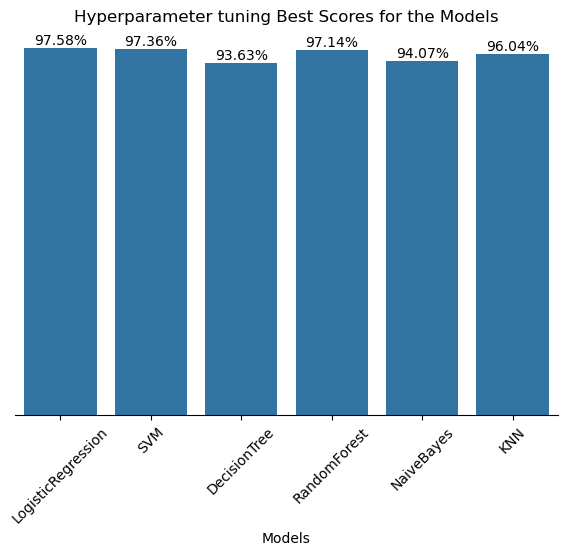

In [50]:
#plotting a barplot of the best_score

fig, ax =plt.subplots(figsize=[7,5])
base_color = sns.color_palette()[0]

sns.barplot(data=gs_data, x='model_name', y='best_score', color=base_color)
plt.xticks(rotation=45)

ax.set_title('Hyperparameter tuning Best Scores for the Models')
ax.set_xlabel('Models')
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.yaxis.set_visible(False)

for index, values in enumerate(gs_data['best_score']):
    ax.annotate(str(round(values*100, 2))+'%', xy=(index, values+0.02), va='center', ha='center')
plt.show()

- From the hyperparameter tuning, these three models **Logistic Regression**, **SVM**, **Random Forest Classifier** performs better with more than **97%** score

## Random Forest Classifier (with best parameter)

In [56]:
#instantiate the model with the best parameter
clf_rf = RandomForestClassifier(criterion='gini', max_depth= 6, max_features='log2', n_estimators= 20)

#fit the model
clf_rf.fit(X_train, y_train)

#predict the y_test
y_pred_rf = clf_rf.predict(X_test)

#check the accuracy score
rf_acc_score = accuracy_score(y_test, y_pred_rf)
rf_acc_score

0.9649122807017544

- The RandomForestClassifier produced an accuracy of 96.5%

### Random Forest Confusion Matrix

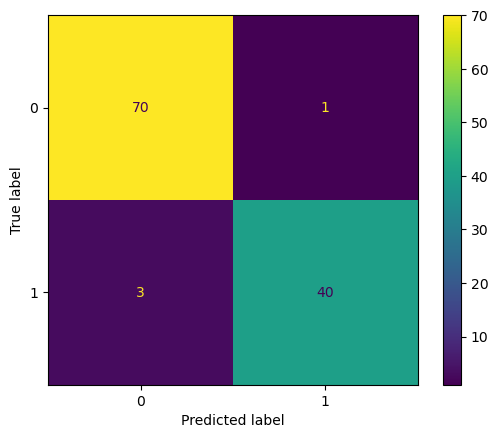

In [57]:
#display the Confusion Matrix for the classifier
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

### ROC CURVE

In [53]:
#import the roc_curve module
from sklearn.metrics import RocCurveDisplay

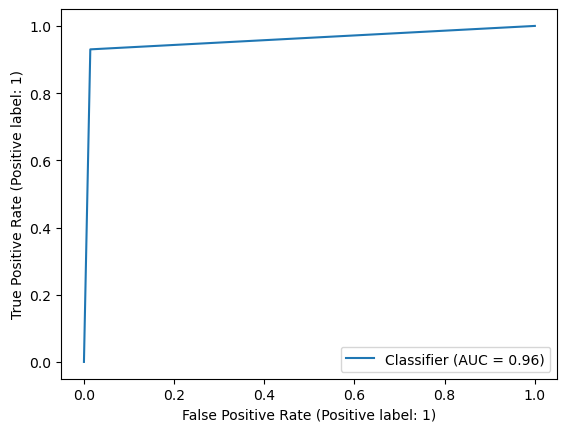

In [58]:
#plot the roc curve
RocCurveDisplay.from_predictions(y_test, y_pred_rf)

## SVM (with the best parameter)

In [59]:
#instantiate the model with the best parameter
clf_svc = SVC(C=0.1, gamma= 0.01, kernel='linear')

#fit the model
clf_svc.fit(X_train, y_train)

#predict the y_test
y_pred_svc = clf_svc.predict(X_test)

#check the accuracy score
svc_acc_score = accuracy_score(y_test, y_pred_svc)
svc_acc_score

0.9824561403508771

### SVC Confusion Matrix

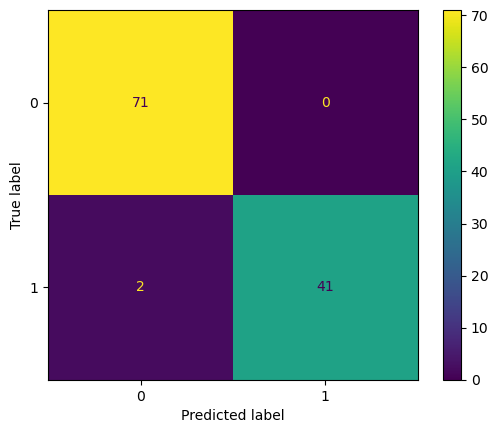

In [60]:
#display the Confusion Matrix for the classifier
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc)

### ROC Curve

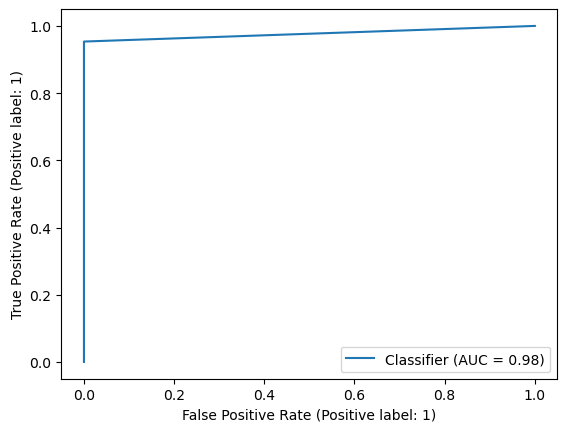

In [61]:
#plot the roc curve
RocCurveDisplay.from_predictions(y_test, y_pred_svc)

## Logistic Regression (with best parameter)

In [62]:
#instantiate the model with the best parameter
clf_lr = LogisticRegression(multi_class='ovr', solver='liblinear')

#fit the model
clf_lr.fit(X_train, y_train)

#predict the y_test
y_pred_lr = clf_lr.predict(X_test)

#check the accuracy score
lr_acc_score = accuracy_score(y_test, y_pred_lr)
lr_acc_score

0.9736842105263158

### Logistic Regression Confusion Matrix

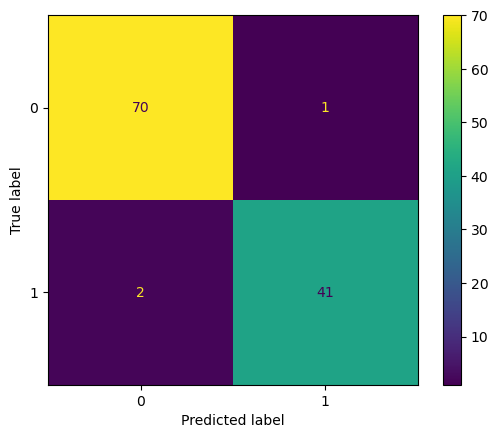

In [63]:
#display the Confusion Matrix for the classifier
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)

### ROC Curve

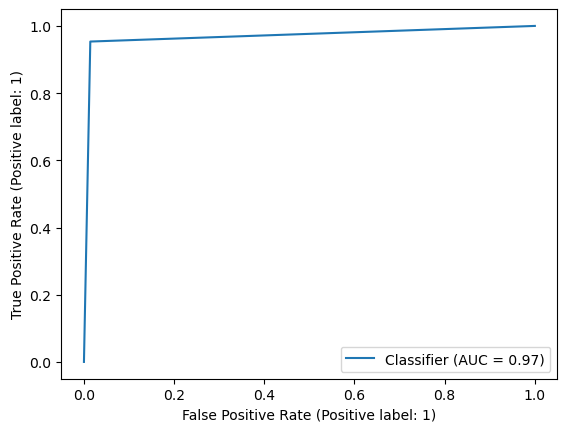

In [64]:
#plot the roc curve
RocCurveDisplay.from_predictions(y_test, y_pred_lr)

## Accuracy Score of the top three Models

In [85]:
#create a dictionary of the scores
acc_scores = {'scores': [rf_acc_score, svc_acc_score, lr_acc_score]}
 

#convert the dictionary to dataframe
top_model_scores = pd.DataFrame(acc_scores)
top_model_scores.index = ['Random Forest', 'SVC', 'Logistic Regression']
top_model_scores

,scores
Random Forest,0.964912
SVC,0.982456
Logistic Regression,0.973684


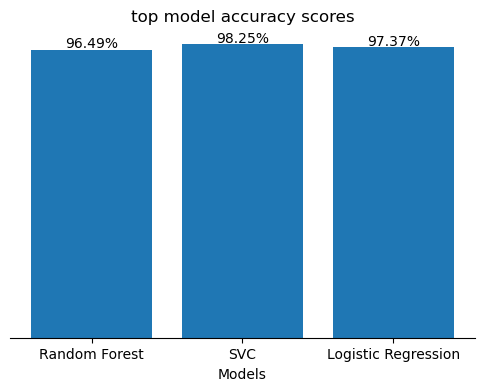

In [95]:
#plotting a bar chart
fig, ax = plt.subplots(figsize=[6,4])
ax.bar(x=top_model_scores['scores'].index, height=top_model_scores['scores'].values)

ax.set_title('top model accuracy scores')
ax.set_xlabel('Models')
ax.set_ylabel('scores')

ax.spines[['top', 'left', 'right']].set_visible(False)
ax.yaxis.set_visible(False)

for index, values in enumerate(top_model_scores['scores']):
    ax.annotate(str(round((values*100), 2))+'%', xy=(index, values+0.02), ha='center', va='center')

plt.show()

- From the bar chart, the **Support Vector Classifier** is the best model for the classification 